## Melanoma Detection

### Problem Statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### About the Datset
**The data set contains the following diseases:**

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

## Project Pipeline

1. Data Reading/Data Understanding → Defining the path for train and test images 
2. Dataset Creation→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
3. Dataset visualisation → Create a code to visualize one instance of all the nine classes present in the dataset 
4. Model Building & training : 
   - Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
   - Choose an appropriate optimiser and loss function for model training
   - Train the model for ~20 epochs
   - Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.
   - Chose an appropriate data augmentation strategy to resolve underfitting/overfitting 

5. Model Building & training on the augmented data :
   - Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
   - Choose an appropriate optimiser and loss function for model training
   - Train the model for ~20 epochs
   - Write your findings after the model fit, see if the earlier issue is resolved or not?
   
6. Class distribution: Examine the current class distribution in the training dataset 
    - Which class has the least number of samples?
    - Which classes dominate the data in terms of the proportionate number of samples?
    - Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.
    - Model Building & training on the rectified class imbalance data :
      - Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
      - Choose an appropriate optimiser and loss function for model training
      - Train the model for ~30 epochs
      - Write your findings after the model fit, see if the issues are resolved or not?

In [1]:
# import libraries
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import cv2
import matplotlib.pyplot as plt

### Data Reading and understanding

In [2]:
dataset_path = '/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/'

In [3]:
train_path = dataset_path + 'Train/'
test_path = dataset_path + 'Test/'
val_path = dataset_path + 'Val/'

In [4]:
classes = []
for filename in os.listdir(train_path):
    print(filename)
    classes.append(filename)
    

seborrheic keratosis
melanoma
basal cell carcinoma
nevus
vascular lesion
dermatofibroma
actinic keratosis
squamous cell carcinoma
pigmented benign keratosis


In [5]:
classes

['seborrheic keratosis',
 'melanoma',
 'basal cell carcinoma',
 'nevus',
 'vascular lesion',
 'dermatofibroma',
 'actinic keratosis',
 'squamous cell carcinoma',
 'pigmented benign keratosis']

In [6]:
# sorting class names alphabetically

classes = sorted(classes)
classes

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Dataset creation
This is the very important step since, we focus on creating input data for the model training.
Input size is suggested to be kept as **180x180** RGB images with batch size of **32**.

In [7]:
### Here I'm trying to prepare data and labels by traversing to all sub-folders inside Train data 
data_lst = []
label_lst = []
i = 0

for file_name in sorted(os.listdir(train_path)): ###-> getting folder name alphabetically to match class names
    #for i in range(0,len(classes)):
    
    sub_dir_path = train_path  + file_name
    print(sub_dir_path)
    #if (os.path.isdir(sub_dir_path)):
        #print("yes")
    for image_name in os.listdir(sub_dir_path):
        img = cv2.imread(sub_dir_path + '/' + image_name)
        img_ = cv2.resize(img,(180,180))
        #print(img.shape)
        data_lst.append(img_)
        label_lst.append(i)
        data_arr = np.array(data_lst)
        labels_arr = np.array(label_lst)
        
    i +=1
    #print(data_lst)
    #print(len(label_lst))
    #print(label_lst)
    

# data_arr = np.array(data_lst)
# labels_arr = np.array(label_lst)


# data_arr_ = np.array(data_lst)
# labels_arr_ = np.array(label_lst)
print("data array:",data_arr)
print("labels array:",labels_arr)


/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/actinic keratosis
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/basal cell carcinoma
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/dermatofibroma
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/melanoma
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/nevus
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/pigmented benign keratosis
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/seborrheic keratosis
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/squamous ce

In [8]:
labels_arr.shape

(2239,)

In [9]:
data_arr.shape

(2239, 180, 180, 3)

In [10]:
## preparing test data

test_data_lst = []
test_label_lst = []
j = 0   



for file_name in sorted(os.listdir(test_path)): ###-> getting folder name alphabetically to match class names
    #for i in range(0,len(classes)):
    
    sub_dir_path_test = test_path  + file_name
    print(sub_dir_path_test)
    #if (os.path.isdir(sub_dir_path)):
        #print("yes")
    for image_name in os.listdir(sub_dir_path_test):
        img = cv2.imread(sub_dir_path_test + '/' + image_name)
        img_ = cv2.resize(img,(180,180))
        #print(img.shape)
        test_data_lst.append(img_)
        test_label_lst.append(j)
        test_data_arr = np.array(test_data_lst)
        test_labels_arr = np.array(test_label_lst)
        
    j +=1
    #print(data_lst)
    #print(len(label_lst))
    #print(label_lst)
    

# data_arr = np.array(data_lst)
# labels_arr = np.array(label_lst)


# data_arr_ = np.array(data_lst)
# labels_arr_ = np.array(label_lst)
print("test data array:",test_data_arr)
print("test labels array:",test_labels_arr)

print("test data shape:",test_data_arr.shape)
print("test labels shape:",test_labels_arr.shape)

/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Test/actinic keratosis
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Test/basal cell carcinoma
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Test/dermatofibroma
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Test/melanoma
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Test/nevus
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Test/pigmented benign keratosis
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Test/seborrheic keratosis
/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Test/squamous cell carci

In [11]:
print("test data shape:",test_data_arr.shape)
print("test labels shape:",test_labels_arr.shape)

test data shape: (118, 180, 180, 3)
test labels shape: (118,)


In [12]:
num_classes = len(classes)
y_train = tf.keras.utils.to_categorical(labels_arr, num_classes)
y_test = tf.keras.utils.to_categorical(test_labels_arr, num_classes)

In [13]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [14]:
y_train.shape

(2239, 9)

In [15]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [16]:
y_test.shape

(118, 9)

In [17]:
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,  # randomly shift images horizontally 
    height_shift_range=0.1,  # randomly shift images vertically
    horizontal_flip=True)

datagen_valid = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,  # randomly shift images horizontally
    height_shift_range=0.1,  # randomly shift images vertically
    horizontal_flip=True)

datagen_test = ImageDataGenerator(
    rescale=1./255)

In [18]:
train_generator = datagen_train.flow(data_arr, y_train, batch_size = 32)

valid_generator = datagen_valid.flow_from_directory(
        val_path,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

test_generator = datagen_test.flow_from_directory(
        test_path,
        target_size=(180, 180),
        batch_size=1,
        class_mode='categorical',
        shuffle=True)

Found 153 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


### Dataset Visualization

In [19]:
num_train = len(data_arr)
num_valid = len(valid_generator.filenames)
num_test = len(test_generator.filenames)

print("total training data:",num_train, "validation data:",num_valid, "testing data:", num_test)

total training data: 2239 validation data: 153 testing data: 118


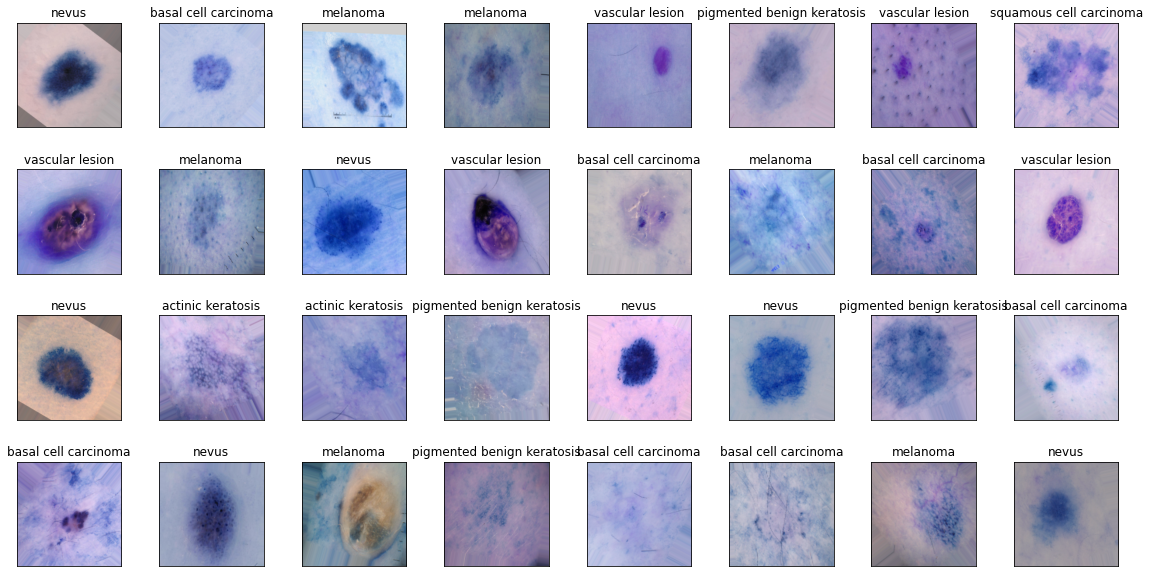

In [20]:
# Lets visualize some of the images we created as our dataset
images, labels = train_generator.next()

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(wspace=0.2, hspace=0.4)

# Lets show the first 32 images of a batch
for i, img in enumerate(images[:32]):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(img)
    image_idx = np.argmax(labels[i])
    ax.set(title=classes[image_idx])

## Neural Network Model Creation

In [21]:
### import libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,BatchNormalization,Dropout,MaxPool2D
from tensorflow.keras.models import Model
# from tensorflow.keras.applications.vgg19 import VGG19
# from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D

In [22]:
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))

model.add(Dense(num_classes,activation="softmax"))

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Training model with 20 epochs

In [24]:

history = model.fit_generator(train_generator,validation_data=test_generator,epochs=20, steps_per_epoch=len(train_generator), validation_steps=len(test_generator) )


/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
70/70 [==============================] - 28s 388ms/step - loss: 2.0104 - accuracy: 0.3122 - val_loss: 3.2651 - val_accuracy: 0.1441
Epoch 2/20
70/70 [==============================] - 27s 379ms/step - loss: 1.4814 - accuracy: 0.4716 - val_loss: 5.8589 - val_accuracy: 0.1695
Epoch 3/20
70/70 [==============================] - 26s 373ms/step - loss: 1.3583 - accuracy: 0.5266 - val_loss: 6.4787 - val_accuracy: 0.2119
Epoch 4/20
70/70 [==============================] - 26s 372ms/step - loss: 1.3063 - accuracy: 0.5413 - val_loss: 6.5595 - val_accuracy: 0.1356
Epoch 5/20
70/70 [==============================] - 27s 383ms/step - loss: 1.3486 - accuracy: 0.5297 - val_loss: 6.9201 - val_accuracy: 0.1610
Epoch 6/20
70/70 [==============================] - 26s 373ms/step - loss: 1.2417 - accuracy: 0.5712 - val_loss: 5.5513 - val_accuracy: 0.1441
Epoch 7/20
70/70 [==============================] - 26s 372ms/step - loss: 1.2077 - accuracy: 0.5677 - val_loss: 6.3003 - val_accuracy: 0.1017

### visualizing model training performance

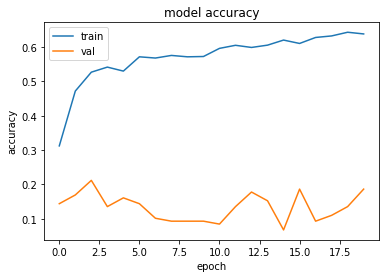

In [25]:
## Plotting training accuracy Vs validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

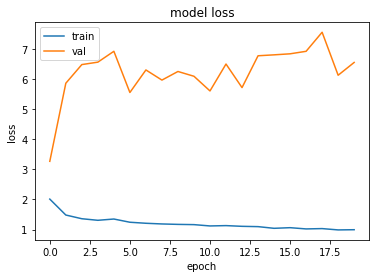

In [26]:
## Plotting training loss Vs Validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Observations
### observation from the above model training
1. model training accuracy is 64.85% while validation accuracy is 7.63%, which clearly shows the model is heavily overfitted
2. there is no gradual decrease in the loss values for both training and validation

### steps to reduce overfitting

1. replacing the model architecture to AlexNet
2. adding dropout layers and set value to 50%
3. using batch normalization

In [27]:
model_1 = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(180,180,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

In [28]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 43, 43, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 43, 43, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 21, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 21, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 384)      

### training model with optimized layers and AlexNet architecture with Adam optimizer

In [29]:
model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history_1 = model_1.fit_generator(train_generator,validation_data=test_generator,epochs=20,steps_per_epoch=len(train_generator),validation_steps=len(test_generator))


Epoch 1/20
70/70 [==============================] - 65s 917ms/step - loss: 7.6033 - accuracy: 0.2617 - val_loss: 14.7204 - val_accuracy: 0.0169
Epoch 2/20
70/70 [==============================] - 68s 975ms/step - loss: 2.2896 - accuracy: 0.3430 - val_loss: 2.2501 - val_accuracy: 0.1356
Epoch 3/20
70/70 [==============================] - 71s 1s/step - loss: 1.9063 - accuracy: 0.3734 - val_loss: 2.5713 - val_accuracy: 0.1356
Epoch 4/20
70/70 [==============================] - 75s 1s/step - loss: 1.8527 - accuracy: 0.3944 - val_loss: 2.5355 - val_accuracy: 0.1949
Epoch 5/20
70/70 [==============================] - 76s 1s/step - loss: 1.7869 - accuracy: 0.3841 - val_loss: 2.1791 - val_accuracy: 0.1864
Epoch 6/20
70/70 [==============================] - 79s 1s/step - loss: 1.7089 - accuracy: 0.4113 - val_loss: 2.6353 - val_accuracy: 0.2288
Epoch 7/20
70/70 [==============================] - 80s 1s/step - loss: 1.6748 - accuracy: 0.4381 - val_loss: 10.3204 - val_accuracy: 0.1356
Epoch 8/20
7

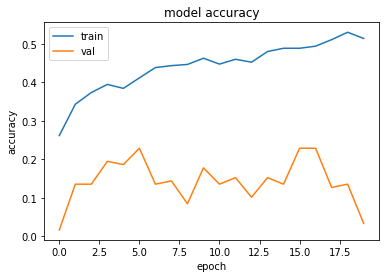

In [30]:
## Plotting training accuracy Vs validation accuracy

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

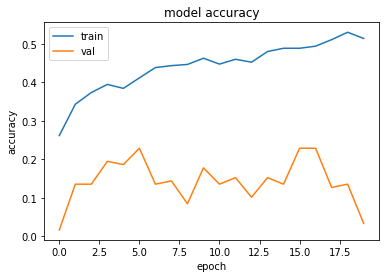

In [31]:
## Plotting training loss Vs validation loss

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Observations
1. training accuracy didn't improve and validation loss is not getting reduced
2. need to try with other optimizers like SGD

In [32]:
model_1.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.01), metrics=['accuracy'])
history_2 = model_1.fit_generator(train_generator,validation_data=test_generator,epochs=20,steps_per_epoch=len(train_generator),validation_steps=len(test_generator))


/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
70/70 [==============================] - 63s 893ms/step - loss: 1.3262 - accuracy: 0.5257 - val_loss: 6.7320 - val_accuracy: 0.0593
Epoch 2/20
70/70 [==============================] - 62s 889ms/step - loss: 1.2658 - accuracy: 0.5561 - val_loss: 6.7383 - val_accuracy: 0.0424
Epoch 3/20
70/70 [==============================] - 117s 2s/step - loss: 1.2433 - accuracy: 0.5623 - val_loss: 5.5003 - val_accuracy: 0.0763
Epoch 4/20
70/70 [==============================] - 134s 2s/step - loss: 1.2040 - accuracy: 0.5717 - val_loss: 3.1771 - val_accuracy: 0.1695
Epoch 5/20
70/70 [==============================] - 67s 934ms/step - loss: 1.2316 - accuracy: 0.5610 - val_loss: 6.6110 - val_accuracy: 0.0339
Epoch 6/20
70/70 [==============================] - 66s 939ms/step - loss: 1.2067 - accuracy: 0.5668 - val_loss: 5.6738 - val_accuracy: 0.0508
Epoch 7/20
70/70 [==============================] - 134s 2s/step - loss: 1.2278 - accuracy: 0.5614 - val_loss: 6.8346 - val_accuracy: 0.1102
Epoch

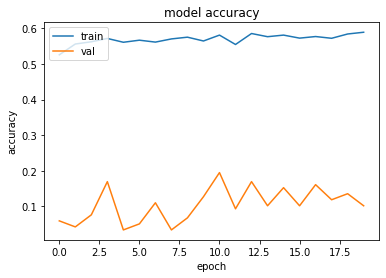

In [33]:
## Plotting training accuracy Vs validation accuracy

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

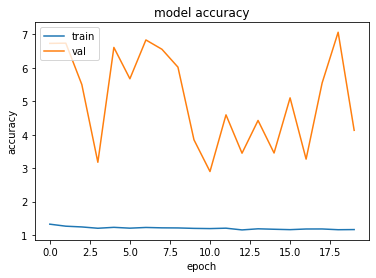

In [34]:
## Plotting training loss Vs validation loss

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Observations:


1. Model is still overfitting
2. 

## Visualizing class distribution

In [37]:
from sklearn.datasets import load_files
from keras.utils import np_utils
from collections import Counter

# define function to load train, test, and validation datasets
def load_data_raw (path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), num_classes)
    
    return files, targets

train_filenames, train_targets = load_data_raw(train_path)

<BarContainer object of 9 artists>

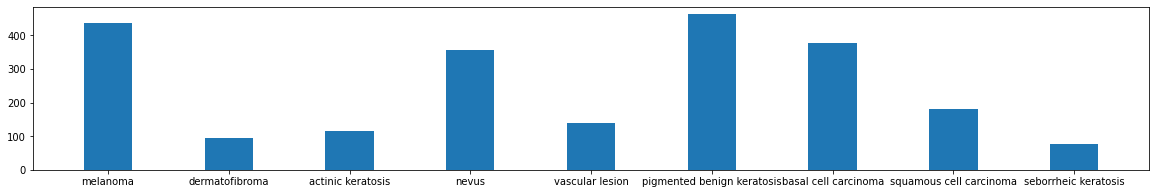

In [47]:
filenames_trimmed = [filename.split('/')[-2] for filename in train_filenames]
classes_count = Counter(filenames_trimmed)

plt.rcParams["figure.figsize"] = (20,3)

# Plot the classes
plt.bar(classes_count.keys(), classes_count.values(),width=0.4) #, color=['blue', 'orange', 'green',''])

### Observation
Classes are heavily imbalanced as below:
1. **dermatofibroma**, **actinic keratosis**, **vascular lesion**, **squamous cell carcinoma** and **seborrheic keratosis** are undersampled, hence needs to increase data here.

Hence we will use some methods to overcome this.

### Methods used for class imbalance
1. the **class_weights** argument in **model.fit**, which we can use to make the model learn more from the minority class.
2. data augmentation using **Image Data Generator** which we have already done
3. oversampling infrequent class

In [51]:
## Oversampling Infrequent classes

from sklearn.utils import resample, shuffle

# Choose one of the 3 for the feature_name
feature_names = {0: 'dermatofibroma', 1: 'actinic keratosis', 2: 'vascular lesion', 3: 'squamous cell carcinoma',
                4:'seborrheic keratosis' }

def upsample(filenames, targets, feature_name, n_samples = 500):
    upsample_idx = []
    

    # Find all the indices for nevus
    for i, path in enumerate(filenames):
        # If feature matches, save the index
        if feature_name in path.split('/'):
            upsample_idx.append(i)
    
    # Remove selected features from filenames to add the upsampled after
    new_filenames = [filename for i, filename in enumerate(filenames) if i not in upsample_idx]
    new_targets = [target for i, target in enumerate(targets) if i not in upsample_idx]

    # Upsample
    resampled_x, resampled_y = resample(filenames[upsample_idx], targets[upsample_idx], n_samples=n_samples, random_state=0)

    # Add the upsampled features to new_filenames and new_targets
    new_filenames += list(resampled_x)
    new_targets += list(resampled_y) 
    
    return np.array(new_filenames), np.array(new_targets)
    
# We upsample twice: once for each feature we want upsampled
upsample_train_x, upsample_train_y = upsample(train_filenames, train_targets, feature_names[0])
upsample_train_x, upsample_train_y = upsample(upsample_train_x, upsample_train_y, feature_names[1])
upsample_train_x, upsample_train_y = upsample(upsample_train_x, upsample_train_y, feature_names[2])
upsample_train_x, upsample_train_y = upsample(upsample_train_x, upsample_train_y, feature_names[3])
upsample_train_x, upsample_train_y = upsample(upsample_train_x, upsample_train_y, feature_names[4])



In [55]:
upsample_train_x

array(['/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/melanoma/ISIC_0000417.jpg',
       '/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/nevus/ISIC_0000507.jpg',
       '/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/pigmented benign keratosis/ISIC_0027151.jpg',
       ...,
       '/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/seborrheic keratosis/ISIC_0010938.jpg',
       '/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/seborrheic keratosis/ISIC_0011132.jpg',
       '/home/shruti/Documents/UpGrad/Executive_PG_ML_AI/DeepLearning/CNN_assignment/MelanomaDetection/dataset/Train/seborrheic keratosis/ISIC_0010978.jpg'],
      dtype='<U152')

<BarContainer object of 9 artists>

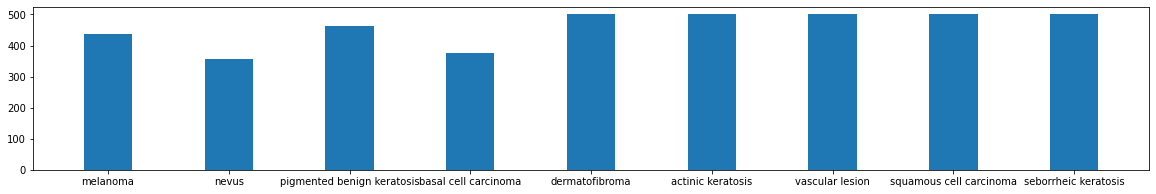

In [52]:
filenames_trimmed = [filename.split('/')[-2] for filename in upsample_train_x]
classes_count_r = Counter(filenames_trimmed)

plt.rcParams["figure.figsize"] = (20,3)

# Plot the classes
plt.bar(classes_count_r.keys(), classes_count_r.values(),width=0.4)

## observation
1. now we can see that all the data from every class is balanced

In [63]:
from keras.preprocessing import image   
import tqdm

# Convert the image paths to tensors Manually
def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(180,180))
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 180, 180, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in (img_paths)]#tqdm
    return np.vstack(list_of_tensors)


train_filenames = paths_to_tensor(upsample_train_x)
train_targets = upsample_train_y



In [60]:
train_filenames.shape

(4133, 180, 180, 3)

In [61]:
train_targets.shape

(4133, 9)

In [62]:
## images has been clearly upsampled!!

In [69]:
train_generator_r = datagen_train.flow(train_filenames, train_targets, batch_size = 32)



In [ ]:


model_1.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.01), metrics=['accuracy'])

history_3 = model_1.fit_generator(train_generator_r,validation_data=test_generator,epochs=30,steps_per_epoch=len(train_generator_r),validation_steps=len(test_generator))



Epoch 1/30
130/130 [==============================] - 100s 764ms/step - loss: 1.2468 - accuracy: 0.5067 - val_loss: 3.8427 - val_accuracy: 0.1441
Epoch 2/30
130/130 [==============================] - 103s 788ms/step - loss: 1.2342 - accuracy: 0.5115 - val_loss: 1.8733 - val_accuracy: 0.3475
Epoch 3/30
130/130 [==============================] - 109s 840ms/step - loss: 1.1980 - accuracy: 0.5246 - val_loss: 2.1040 - val_accuracy: 0.3559
Epoch 4/30
130/130 [==============================] - 124s 954ms/step - loss: 1.1766 - accuracy: 0.5413 - val_loss: 1.6060 - val_accuracy: 0.4661
Epoch 5/30
130/130 [==============================] - 134s 1s/step - loss: 1.1819 - accuracy: 0.5267 - val_loss: 2.6520 - val_accuracy: 0.3136
Epoch 6/30
130/130 [==============================] - 153s 1s/step - loss: 1.1791 - accuracy: 0.5304 - val_loss: 2.5861 - val_accuracy: 0.2881
Epoch 7/30
130/130 [==============================] - 155s 1s/step - loss: 1.1774 - accuracy: 0.5294 - val_loss: 2.6572 - val_accu

### Observations and conclusions

1. Model's accuracy improved from the previous training.
2. With proper hits and trials of using optimizers and loss function, its performance could have increased in more better way
3. Suggested to use more number of epochs for monitoring in decrease of loss value and increase in model's accuracy
4. From the above results, we can say that our model was able to learn and if would have trained for more iterations it could have performed well.